In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

2024-05-05 15:17:58.247529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 15:17:58.247659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 15:17:58.403401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#  Data exploring

In [3]:
df = pd.read_csv("/kaggle/input/tafahasmodified/audio_features(9).csv")
df.head()

,File Path,File Name (WAV),Mean MFCC Coefficients,Spectral Centroid,Sample Rate,Duration (seconds),Class Label
0,/kaggle/working/output_dataset/Generated Voice...,2.6.9.0.0.wav,"[-463.0484619140625, 107.15552520751953, 25.76...",1253.355869,441000,18,Generated Voices by ai voices
1,/kaggle/working/output_dataset/Generated Voice...,2.6.7.0.0.wav,"[-443.50152587890625, 97.10150909423828, 31.84...",922.834842,441000,18,Generated Voices by ai voices
2,/kaggle/working/output_dataset/Generated Voice...,2.5.8.0.0.wav,"[-454.6553649902344, 79.39002227783203, 26.142...",961.790486,441000,18,Generated Voices by ai voices
3,/kaggle/working/output_dataset/Generated Voice...,2.4.6.0.0.wav,"[-473.5799865722656, 81.26899719238281, 27.133...",1005.355416,441000,18,Generated Voices by ai voices
4,/kaggle/working/output_dataset/Generated Voice...,2.6.0.0.0.wav,"[-483.6876220703125, 95.53182983398438, 29.728...",1001.768648,441000,18,Generated Voices by ai voices


In [4]:
data_features = df.iloc[:, 2:6]

In [5]:
data_features.head() 

,Mean MFCC Coefficients,Spectral Centroid,Sample Rate,Duration (seconds)
0,"[-463.0484619140625, 107.15552520751953, 25.76...",1253.355869,441000,18
1,"[-443.50152587890625, 97.10150909423828, 31.84...",922.834842,441000,18
2,"[-454.6553649902344, 79.39002227783203, 26.142...",961.790486,441000,18
3,"[-473.5799865722656, 81.26899719238281, 27.133...",1005.355416,441000,18
4,"[-483.6876220703125, 95.53182983398438, 29.728...",1001.768648,441000,18


In [7]:
data_features['Mean MFCC Coefficients'] 

0      [-463.0484619140625, 107.15552520751953, 25.76...
1      [-443.50152587890625, 97.10150909423828, 31.84...
2      [-454.6553649902344, 79.39002227783203, 26.142...
3      [-473.5799865722656, 81.26899719238281, 27.133...
4      [-483.6876220703125, 95.53182983398438, 29.728...
                             ...                        
133    [-427.9771728515625, 97.63719177246094, 28.873...
134    [-436.3186950683594, 85.73974609375, 28.996187...
135    [-428.73193359375, 92.20032501220703, 28.93862...
136    [-429.6935729980469, 89.70471954345703, 28.540...
137    [-387.77105712890625, 119.86361694335938, 29.6...
Name: Mean MFCC Coefficients, Length: 138, dtype: object

In [8]:
df['Class Label'].unique() 

array(['Generated Voices by ai voices', 'Real Voices', 'Cloned Voices'],
      dtype=object)

#  mfcc separating 

In [9]:
# Convert the "Mean MFCC Coefficients" column from string to list of floats
data_features['Mean MFCC Coefficients'] = data_features['Mean MFCC Coefficients'].apply(eval)

In [10]:
data_features['Mean MFCC Coefficients']

0      [-463.0484619140625, 107.15552520751953, 25.76...
1      [-443.50152587890625, 97.10150909423828, 31.84...
2      [-454.6553649902344, 79.39002227783203, 26.142...
3      [-473.5799865722656, 81.26899719238281, 27.133...
4      [-483.6876220703125, 95.53182983398438, 29.728...
                             ...                        
133    [-427.9771728515625, 97.63719177246094, 28.873...
134    [-436.3186950683594, 85.73974609375, 28.996187...
135    [-428.73193359375, 92.20032501220703, 28.93862...
136    [-429.6935729980469, 89.70471954345703, 28.540...
137    [-387.77105712890625, 119.86361694335938, 29.6...
Name: Mean MFCC Coefficients, Length: 138, dtype: object

In [11]:
# Flatten the lists in the "Mean MFCC Coefficients" column and create new columns
data_features = data_features.join(pd.DataFrame(data_features['Mean MFCC Coefficients'].tolist(), columns=[f'MFCC_{i}' for i in range(20)]))

In [12]:
# Drop the original "Mean MFCC Coefficients" column
data_features.drop('Mean MFCC Coefficients', axis=1, inplace=True)

In [13]:
data_features.head()

,Spectral Centroid,Sample Rate,Duration (seconds),MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,1253.355869,441000,18,-463.048462,107.155525,25.766592,-37.599911,-44.050316,-7.894618,25.028833,...,-15.572581,1.249795,8.345414,-1.579929,-15.623175,-17.928823,-7.391050,3.427956,3.969828,-3.543819
1,922.834842,441000,18,-443.501526,97.101509,31.845524,-21.510380,-31.925879,-8.258445,15.786948,...,-11.941571,0.350331,5.396183,-2.528261,-13.673671,-15.571008,-7.055789,1.881229,2.339669,-4.195484
2,961.790486,441000,18,-454.655365,79.390022,26.142775,-16.344536,-22.694374,-1.335382,18.684362,...,-11.513140,-0.620874,4.733402,-1.137631,-10.575718,-13.018121,-6.886503,0.098712,0.699097,-4.218849
3,1005.355416,441000,18,-473.579987,81.268997,27.133022,-16.327650,-23.541739,-3.003403,16.318396,...,-10.502681,0.522660,5.078091,-1.536211,-10.858258,-12.544206,-5.975734,0.531934,0.210381,-5.035092
4,1001.768648,441000,18,-483.687622,95.531830,29.728680,-23.030621,-31.404675,-5.470304,19.396692,...,-13.762914,-0.556363,5.837559,-1.005819,-11.779822,-14.237789,-7.066321,0.448753,0.369540,-5.390703


In [14]:
# Split the data into features (X) and target variable (y)
X = data_features[['MFCC_0', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5',
                   'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 
                   'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17',
                   'MFCC_18', 'MFCC_19','Spectral Centroid']]
y = df['Class Label']

In [15]:
y.head()

0    Generated Voices by ai voices
1    Generated Voices by ai voices
2    Generated Voices by ai voices
3    Generated Voices by ai voices
4    Generated Voices by ai voices
Name: Class Label, dtype: object

In [16]:
y.value_counts()

Class Label
Real Voices                      47
Cloned Voices                    46
Generated Voices by ai voices    45
Name: count, dtype: int64

>****The random seed will affect the random initialization of the model's weights, biases, or any other trainable parameters that are part of the model architecture. The random seed determines the starting point for the random number generation during the initialization process and it can help ensure consistent weight initialization across different runs.****

In [17]:
# Set the random seed
import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
# Spllting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                    )

#  Data preprocessing 

In [19]:
# Lts do data normalization
max_data = np.max(X_train)
min_data = np.min(X_train)
X_train = (X_train-min_data)/(max_data-min_data+1e-6)
X_train =  X_train-0.5

max_data = np.max(X_test)
min_data = np.min(X_test)
X_test = (X_test-min_data)/(max_data-min_data+1e-6)
X_test =  X_test-0.5

In [20]:
#checking if they are arrays 
print(type(X_train) == np.ndarray)
print(type(X_test) == np.ndarray)

False
False


In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Let's perform the necessary preparation steps to get the data into the correct format for Keras
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode the target
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

(103, 21)
['Cloned Voices' 'Generated Voices by ai voices' 'Real Voices']


> ****In the cases of audio classification using MFCC values a 1D input would be suitable for CNN model, since MFCC features are typically represented as a sequence of vectors over time, a 1D CNN can be employed to extract temporal patterns and dependencies from the sequence of MFCC vectors.****

In [22]:
# Define the number of classes
num_classes = 3
model = Sequential()

model.add(Conv1D(64, 3, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(64, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(learning_rate=0.00001,decay=1e-6)
#opt = keras.optimizers.RMSprop(learning_rate=0.1,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 21, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 21, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 10, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 10, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 10, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 5, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 5, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           96

 Total params: 223,875 (874.51 KB)

 Trainable params: 223,491 (873.01 KB)

 Non-trainable params: 384 (1.50 KB)

In [23]:
# Train the model
history = model.fit(X_train, y_train, batch_size=16,
                    epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.2576 - loss: 1.1568 - val_accuracy: 0.2571 - val_loss: 1.0990
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3041 - loss: 1.1819 - val_accuracy: 0.2571 - val_loss: 1.0987
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2948 - loss: 1.1492 - val_accuracy: 0.4000 - val_loss: 1.0985
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2463 - loss: 1.1611 - val_accuracy: 0.4000 - val_loss: 1.0984
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2390 - loss: 1.1364 - val_accuracy: 0.4000 - val_loss: 1.0984
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3543 - loss: 1.1397 - val_accuracy: 0.4000 - val_loss: 1.0983
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2312 - loss: 1.1584 - val_accuracy: 0.4000 - val_loss: 1.0983
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3286 - loss: 1.1534 - val_accuracy: 0.4000 - val_loss:

In [24]:
# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Test Accuracy: 0.5429


In [25]:
# Calculate the sizes of the datasets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
validation_size = test_size

print("Training Set Size:", train_size)
print("Testing Set Size:", test_size)

Training Set Size: 103
Testing Set Size: 35


Final Training Accuracy: 0.49
Final Testing Accuracy: 0.54


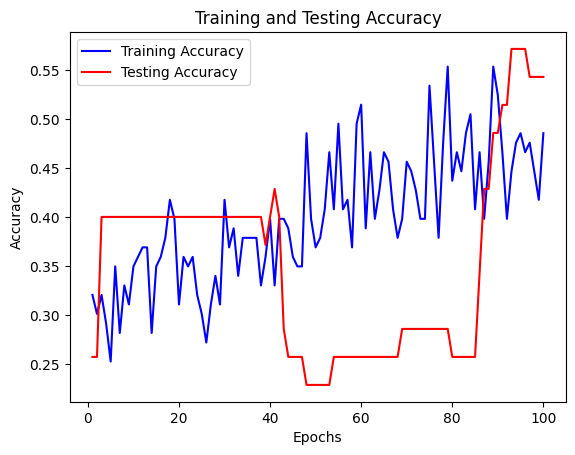

In [26]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#Print the final accuracy
final_train_accuracy = "{:.2f}".format(train_accuracy[-1])
final_val_accuracy = "{:.2f}".format(val_accuracy[-1])
print(f"Final Training Accuracy: {final_train_accuracy}")
print(f"Final Testing Accuracy: {final_val_accuracy}")

# Plotting the accuracy values
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training Loss:  1.04
Testing Loss:  1.05


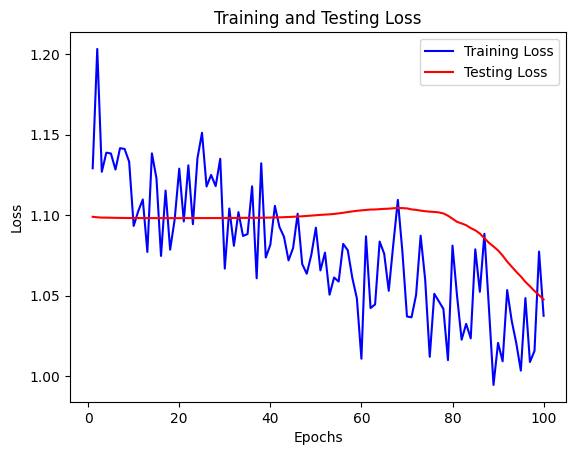

In [27]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print training and validation loss
final_train_loss = "{:.2f}".format(train_loss[-1])
final_val_loss = "{:.2f}".format(val_loss[-1])
print("Training Loss: ", final_train_loss)
print("Testing Loss: ", final_val_loss)

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
               precision    recall  f1-score   support

Cloned Voices       0.53      0.89      0.67         9
    AI Voices       0.00      0.00      0.00        12
  Real Voices       0.55      0.79      0.65        14

     accuracy                           0.54        35
    macro avg       0.36      0.56      0.44        35
 weighted avg       0.36      0.54      0.43        35

Precision: 0.36
Recall: 0.54
F1-Score: 0.43
Accuracy: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

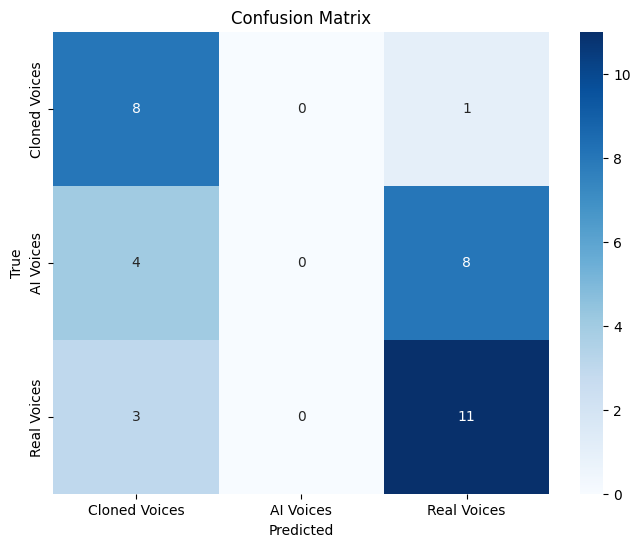

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Obtain predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Define class labels
class_labels = ['Cloned Voices', 'AI Voices', 'Real Voices']

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_labels)

# Print the report
print(report)

# Calculate precision, recall, and accuracy
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print precision, recall, and accuracy
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

# Plot the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a heatmap with correct tick labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Calculate the predicted classes
y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_pred_val = np.argmax(model.predict(X_test), axis=1)

cm_train = confusion_matrix(np.argmax(y_train, axis=1), y_pred_train)
cm_val = confusion_matrix(np.argmax(y_test, axis=1), y_pred_val)

# Print confusion matrix
print("Confusion Matrix - Training:")
print(cm_train)
print("Confusion Matrix - Testing:")
print(cm_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix - Training:
[[37  0  0]
 [29  4  0]
 [ 3 27  3]]
Confusion Matrix - Testing:
[[ 8  0  1]
 [ 4  0  8]
 [ 3  0 11]]


In [30]:
# Get the number of classes
num_classes = cm.shape[0]

# Print the accuracy for each class
for i in range(num_classes):
    class_accuracy = cm[i, i] / np.sum(cm[i, :])
    print("Accuracy for class", i, ":", "{:.2f}".format(class_accuracy))

Accuracy for class 0 : 0.89
Accuracy for class 1 : 0.00
Accuracy for class 2 : 0.79


#  Cloned=0, Generated by ai=1, Real=2

In [31]:
print(lb.classes_)

['Cloned Voices' 'Generated Voices by ai voices' 'Real Voices']


In [1]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")